In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Boston Dataset 

### Dataset loading

In [9]:
#http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn import datasets

boston = datasets.load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Dataframe transform  

In [10]:
from pandas import DataFrame

boston_frame = DataFrame(boston.data)
boston_frame.columns = boston.feature_names
boston_frame['target'] = boston.target
boston_frame.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Feature plots

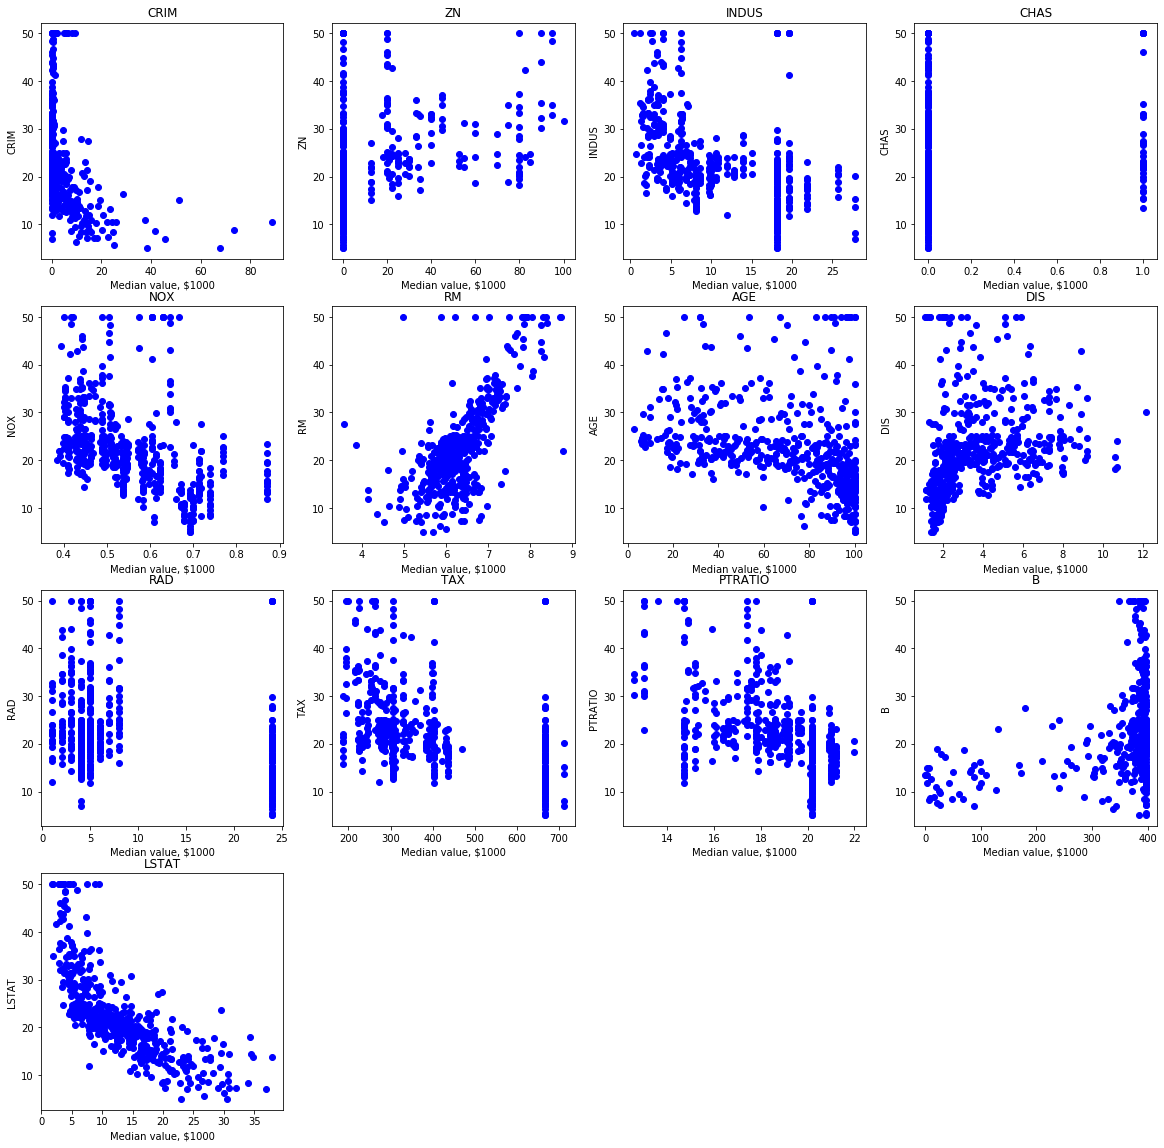

In [11]:
pyplot.figure(figsize(20, 20))

plot_number = 0

for feature_name in boston.feature_names:
    pyplot.subplot(4, 4, plot_number + 1)
    pyplot.scatter(list(map(lambda x : x[plot_number], boston.data)), boston.target, color = 'b')
    pyplot.title(feature_name)
    pyplot.xlabel('Median value, $1000')
    pyplot.ylabel(feature_name)
    plot_number += 1

### Linear regression model learning

In [12]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(boston.data, boston.target)
boston_predictions = linear_regressor.predict(boston.data)


### Basic estimators

In [13]:
from sklearn import metrics

mea = metrics.mean_absolute_error(boston.target, boston_predictions)
print ('MAE = ', mea)
msa = metrics.mean_squared_error(boston.target, boston_predictions)
print ('MSE = ', msa)


MAE =  3.2708628109003115
MSE =  21.894831181729202


### Error plotting

Text(0, 0.5, 'target')

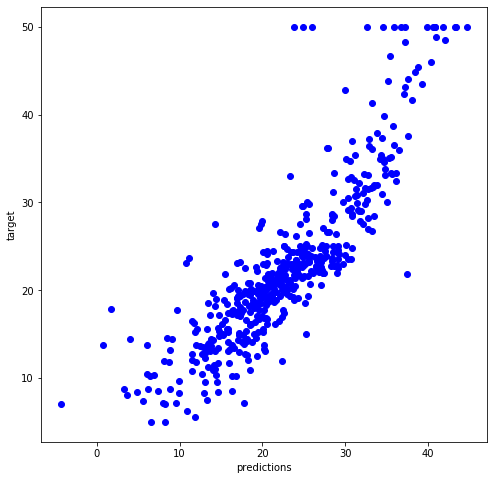

In [14]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(boston_predictions, boston.target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')


### Linear regression function

In [15]:
print ("Model")
print ("y = {:.3f}*x1 + {:.3f}*x2 + ... + {:.3f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))


Model
y = -0.108*x1 + 0.046*x2 + ... + 36.459


# Generated dataset

### Generate dataset

In [16]:
shum = random.randint(1,20)
print(shum)

8


In [17]:
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
data, target, coef = datasets.make_regression(n_samples=390, n_features = 39, n_informative = 8, n_targets = 1, 
                                              noise = shum, coef = True, random_state = 2)  

### Plot data

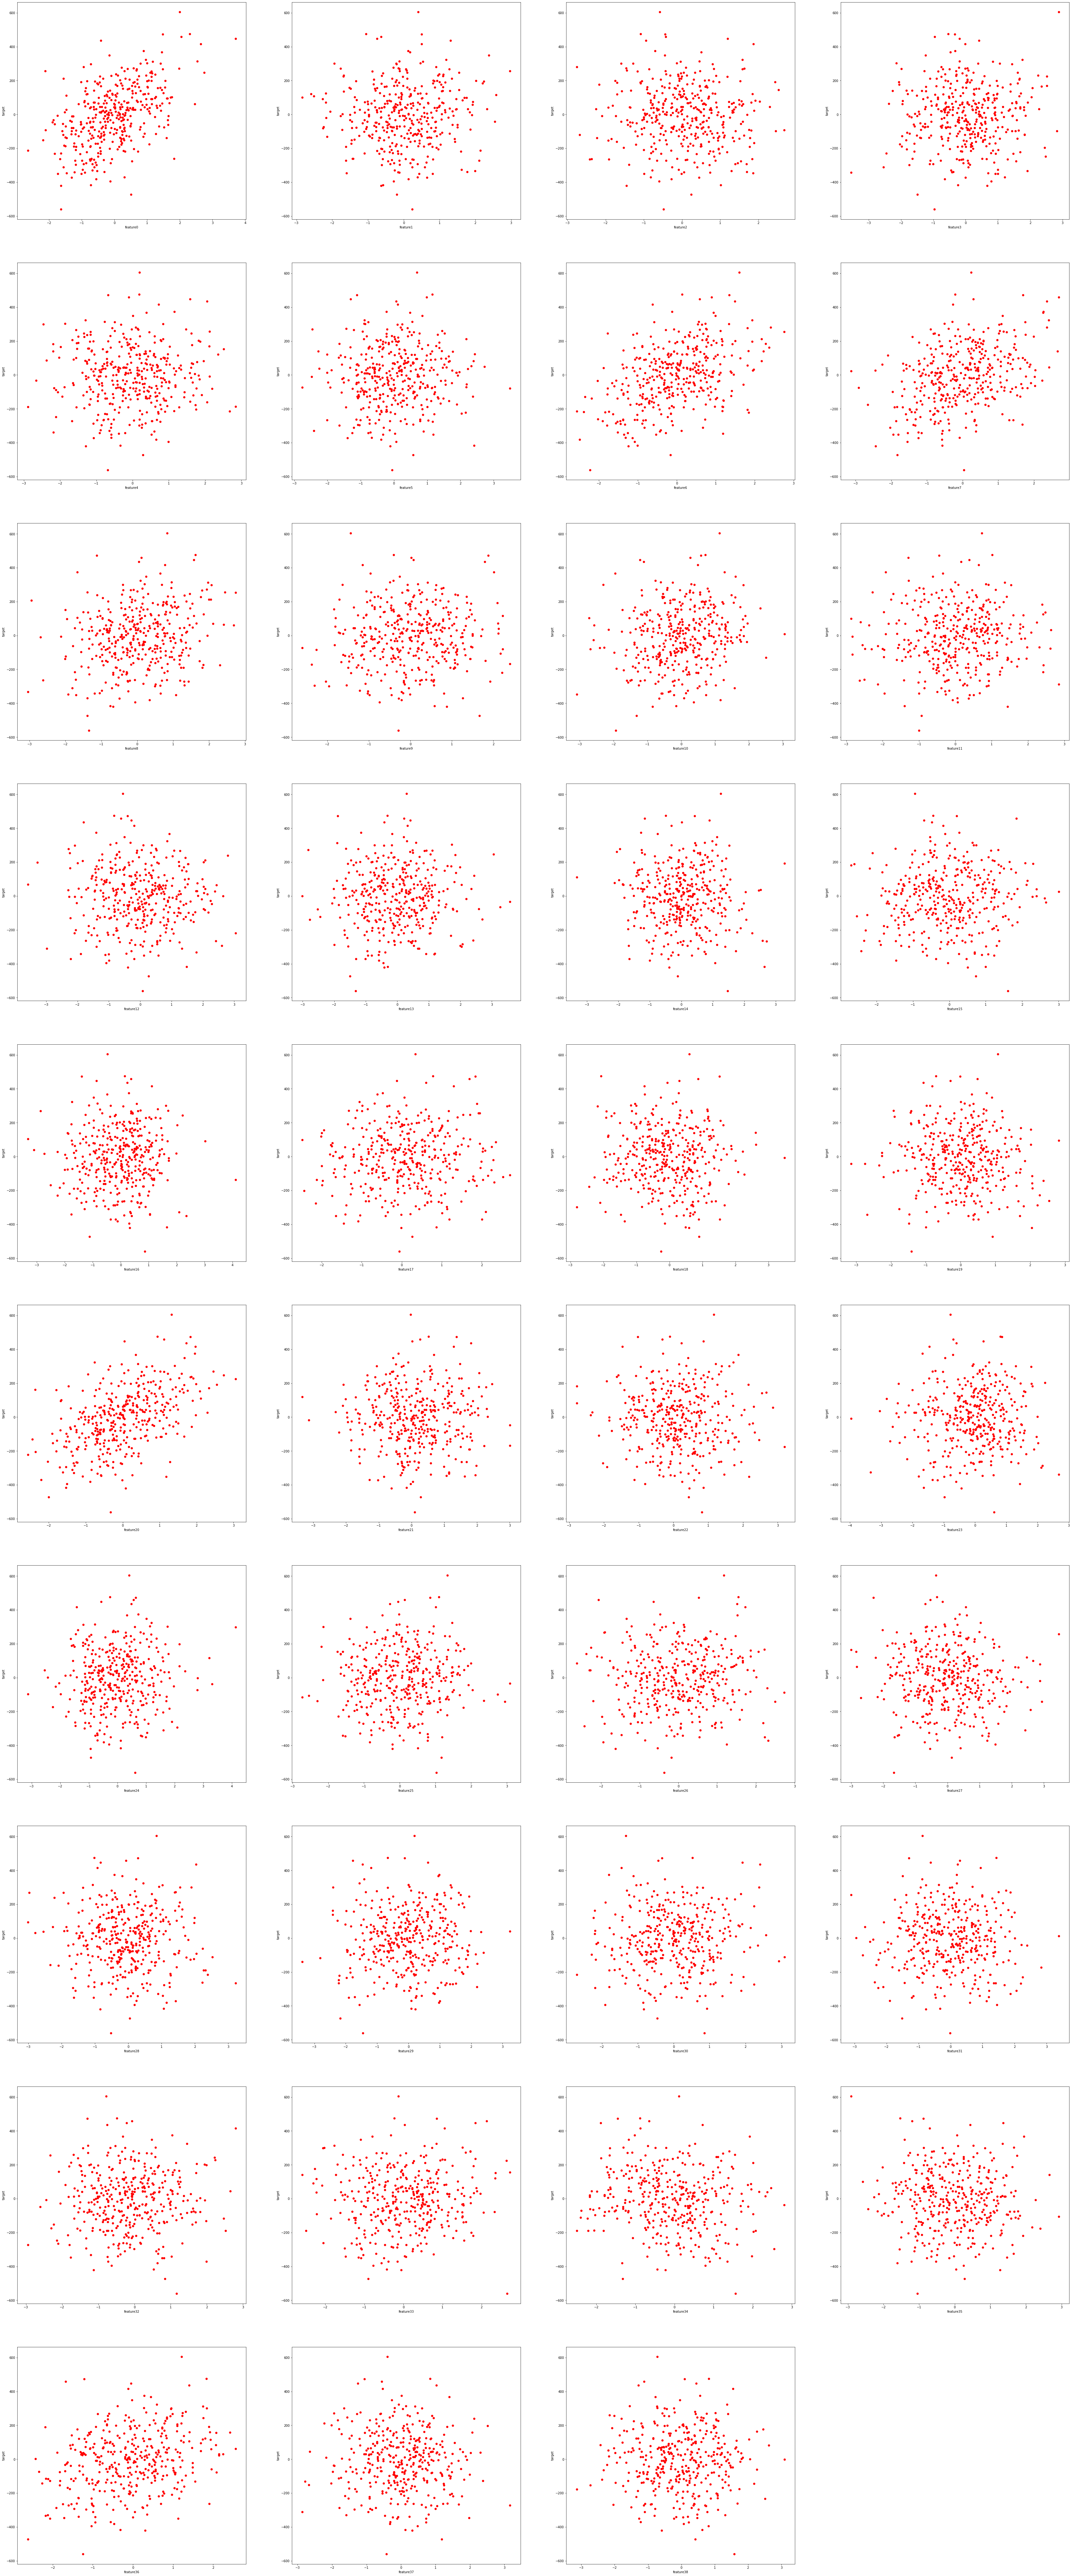

In [18]:
pyplot.figure(figsize(60, 150))

for i in range(39):
    pyplot.subplot(10,4, i + 1)
    pyplot.scatter(list(map(lambda x : x[i], data)), target, color = 'r')
    pyplot.xlabel('feature'+ str(i))
    pyplot.ylabel('target')

### Learn linear regression model and get predictions

In [19]:
regression_model = linear_model.LinearRegression()
regression_model.fit(data, target)
predictions = regression_model.predict(data)

### Print linear regression coefficients

In [20]:
print ("Model coefficients")
print ('x0 = ', regression_model.intercept_)
print ('x1, x2 = ', regression_model.coef_)

Model coefficients
x0 =  0.026260818554582954
x1, x2 =  [ 9.70176074e+01 -2.48221064e-01  2.72605407e-01  5.81727537e-01
 -8.64807736e-01 -4.32702394e-02  9.11941151e+01  5.79458962e+01
  2.93554659e+01  3.51918901e-01  3.16420451e+01  1.49689546e+01
  1.21513222e-01 -9.88891921e-03  3.68552039e-02  4.79323157e-01
 -5.52967487e-02 -8.14790442e-02 -1.58270399e-01 -7.38273205e-01
  9.77005927e+01 -2.11078821e-01  6.85616917e-01  7.11332684e-01
 -2.58043707e-01  2.17360367e-01  2.57711811e-01 -3.98178326e-01
 -1.28775817e-01  1.63133075e-01  6.94877263e-02  3.26565109e-01
 -7.27592346e-01 -1.14821308e+00  2.61398547e-02 -1.28833010e-01
  4.35609732e+01  2.71405580e-01 -3.13771340e-01]


### Plot predictions

Text(0, 0.5, 'target')

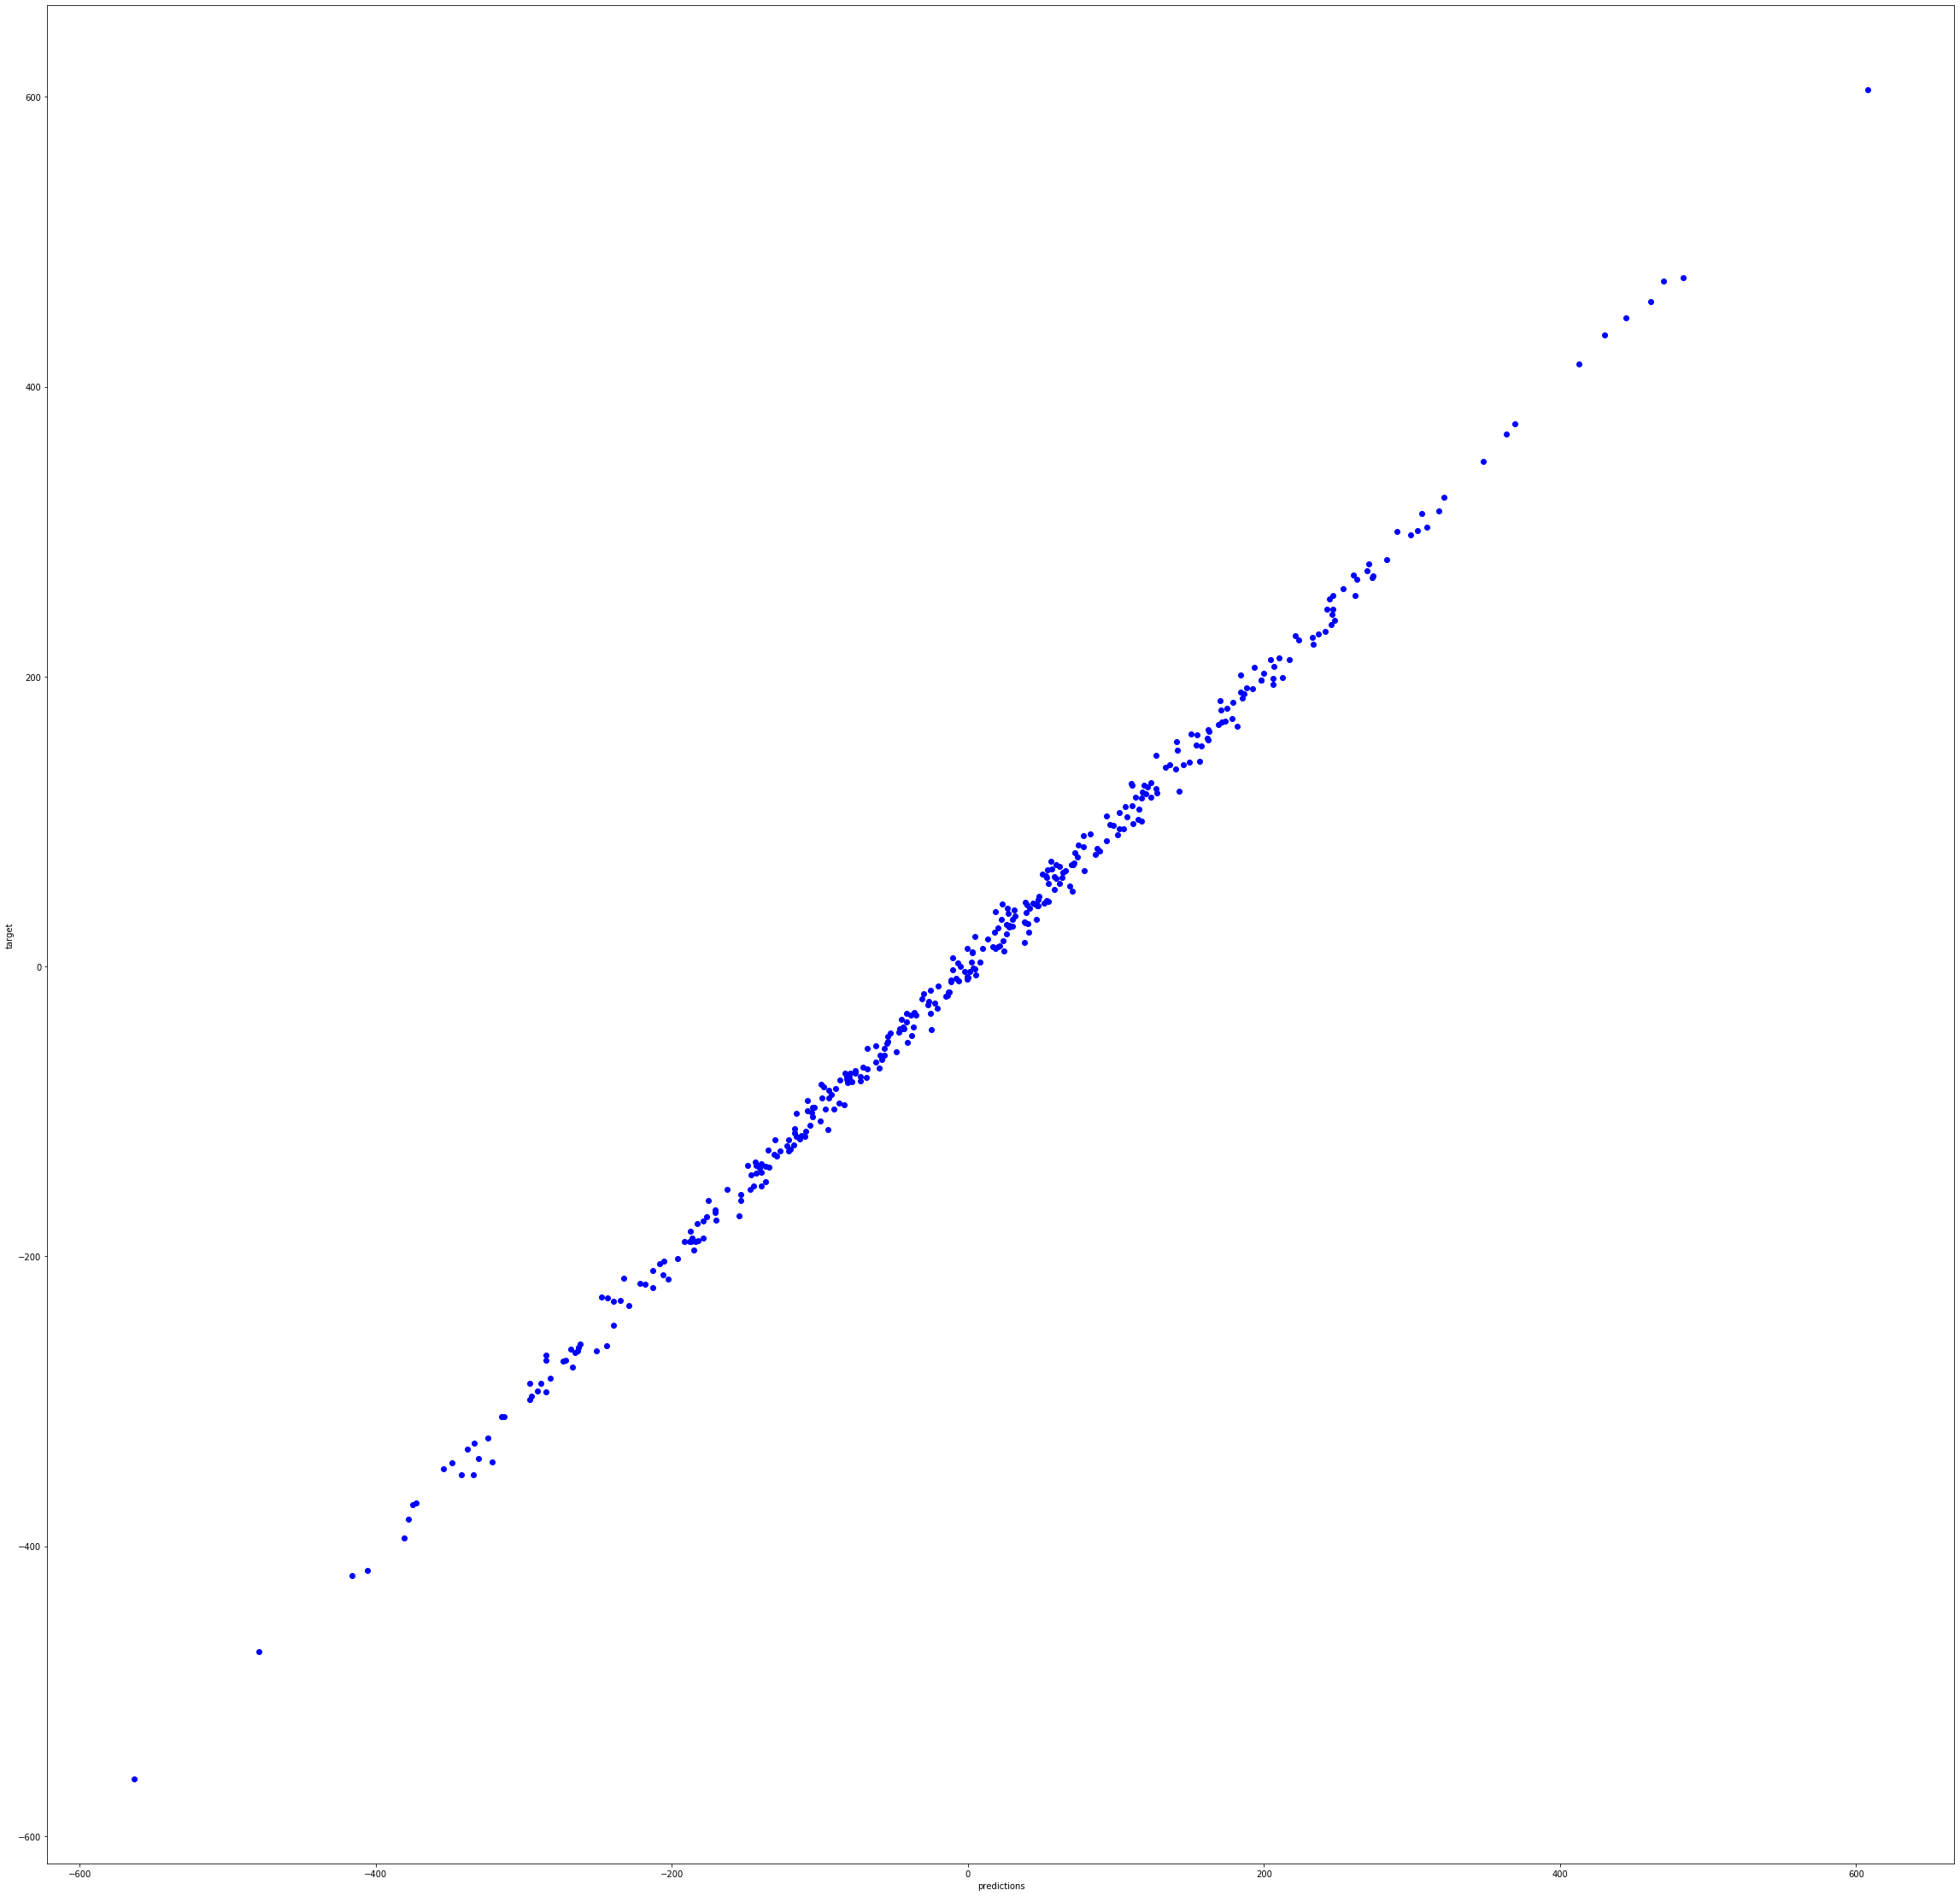

In [21]:
pyplot.figure(figsize(40, 40))
pyplot.scatter(predictions, target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')

### Print learned and true regression models

In [22]:
uravn = "y = "
for i in range(39):
    uravn += "{:.3f}x" + str(i + 1)
    if i != 38:
        uravn += " + "
print(uravn)

y = {:.3f}x1 + {:.3f}x2 + {:.3f}x3 + {:.3f}x4 + {:.3f}x5 + {:.3f}x6 + {:.3f}x7 + {:.3f}x8 + {:.3f}x9 + {:.3f}x10 + {:.3f}x11 + {:.3f}x12 + {:.3f}x13 + {:.3f}x14 + {:.3f}x15 + {:.3f}x16 + {:.3f}x17 + {:.3f}x18 + {:.3f}x19 + {:.3f}x20 + {:.3f}x21 + {:.3f}x22 + {:.3f}x23 + {:.3f}x24 + {:.3f}x25 + {:.3f}x26 + {:.3f}x27 + {:.3f}x28 + {:.3f}x29 + {:.3f}x30 + {:.3f}x31 + {:.3f}x32 + {:.3f}x33 + {:.3f}x34 + {:.3f}x35 + {:.3f}x36 + {:.3f}x37 + {:.3f}x38 + {:.3f}x39


In [28]:
print ("Learned regression model")
print ((uravn + " + {:.3f}\n").format( regression_model.coef_[0], 
                                     regression_model.coef_[1],
                                     regression_model.coef_[2],
                                     regression_model.coef_[3],
                                     regression_model.coef_[4],
                                     regression_model.coef_[5],
                                     regression_model.coef_[6],
                                     regression_model.coef_[7],
                                     regression_model.coef_[8],
                                     regression_model.coef_[9],
                                     regression_model.coef_[10],
                                     regression_model.coef_[11],
                                     regression_model.coef_[12],
                                     regression_model.coef_[13],
                                     regression_model.coef_[14],
                                     regression_model.coef_[15],
                                     regression_model.coef_[16],
                                     regression_model.coef_[17],
                                     regression_model.coef_[18],
                                     regression_model.coef_[19],
                                     regression_model.coef_[20],
                                     regression_model.coef_[21],
                                     regression_model.coef_[22],
                                     regression_model.coef_[23],
                                     regression_model.coef_[24],
                                     regression_model.coef_[25],
                                     regression_model.coef_[26],
                                     regression_model.coef_[27],
                                     regression_model.coef_[28],
                                     regression_model.coef_[29],
                                     regression_model.coef_[30],
                                     regression_model.coef_[31],
                                     regression_model.coef_[32],
                                     regression_model.coef_[33],
                                     regression_model.coef_[34],
                                     regression_model.coef_[35],
                                     regression_model.coef_[36],
                                     regression_model.coef_[37],
                                     regression_model.coef_[38],
                                     regression_model.intercept_))
print ("True regression model")
print (uravn.format( coef[0], 
                     coef[1],
                     coef[2],
                     coef[3],
                     coef[4],
                     coef[5],
                     coef[6],
                     coef[7],
                     coef[8],
                     coef[9],
                     coef[10],
                     coef[11],
                     coef[12],
                     coef[13],
                     coef[14],
                     coef[15],
                     coef[16],
                     coef[17],
                     coef[18],
                     coef[19],
                     coef[20],
                     coef[21],
                     coef[22],
                     coef[23],
                     coef[24],
                     coef[25],
                     coef[26],
                     coef[27],
                     coef[28],
                     coef[29],
                     coef[30],
                     coef[31],
                     coef[32],
                     coef[33],
                     coef[34],
                     coef[35],
                     coef[36],
                     coef[37],
                     coef[38]))

Learned regression model
y = 97.018x1 + -0.248x2 + 0.273x3 + 0.582x4 + -0.865x5 + -0.043x6 + 91.194x7 + 57.946x8 + 29.355x9 + 0.352x10 + 31.642x11 + 14.969x12 + 0.122x13 + -0.010x14 + 0.037x15 + 0.479x16 + -0.055x17 + -0.081x18 + -0.158x19 + -0.738x20 + 97.701x21 + -0.211x22 + 0.686x23 + 0.711x24 + -0.258x25 + 0.217x26 + 0.258x27 + -0.398x28 + -0.129x29 + 0.163x30 + 0.069x31 + 0.327x32 + -0.728x33 + -1.148x34 + 0.026x35 + -0.129x36 + 43.561x37 + 0.271x38 + -0.314x39 + 0.026

True regression model
y = 96.722x1 + 0.000x2 + 0.000x3 + 0.000x4 + 0.000x5 + 0.000x6 + 92.229x7 + 57.727x8 + 28.974x9 + 0.000x10 + 31.605x11 + 14.862x12 + 0.000x13 + 0.000x14 + 0.000x15 + 0.000x16 + 0.000x17 + 0.000x18 + 0.000x19 + 0.000x20 + 98.005x21 + 0.000x22 + 0.000x23 + 0.000x24 + 0.000x25 + 0.000x26 + 0.000x27 + 0.000x28 + 0.000x29 + 0.000x30 + 0.000x31 + 0.000x32 + 0.000x33 + 0.000x34 + 0.000x35 + 0.000x36 + 43.852x37 + 0.000x38 + 0.000x39


### Print evaluation metrics

In [29]:
mae = metrics.mean_absolute_error(target, predictions)
print ('MAE = ', mae)
mse = metrics.mean_squared_error(target, predictions)
print ('MSE = ', mse)

MAE =  6.278268742206964
MSE =  61.69225139159592
